In [40]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics

In [2]:
# Read data frame 
df = pd.read_csv("dataset/housing.csv") 
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [41]:
# Featured engineering (Add functional features)

df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [20]:
# Drop missing values
df = df.dropna()
df.count()

longitude                   20433
latitude                    20433
housing_median_age          20433
total_rooms                 20433
total_bedrooms              20433
population                  20433
households                  20433
median_income               20433
median_house_value          20433
ocean_proximity             20433
rooms_per_household         20433
bedrooms_per_room           20433
population_per_household    20433
dtype: int64

/tmp/ipykernel_6693/3416321763.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(251); plt.boxplot(df["rooms_per_household"]); plt.title("rooms_per_household")
/tmp/ipykernel_6693/3416321763.py:12: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(252); plt.boxplot(df["bedrooms_per_room"]); plt.title("bedrooms_per_room")
/tmp/ipykernel_6693/3416321763.py:13: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(253); plt.boxplot(df["population_per_household"]); plt.title("population_per_household")


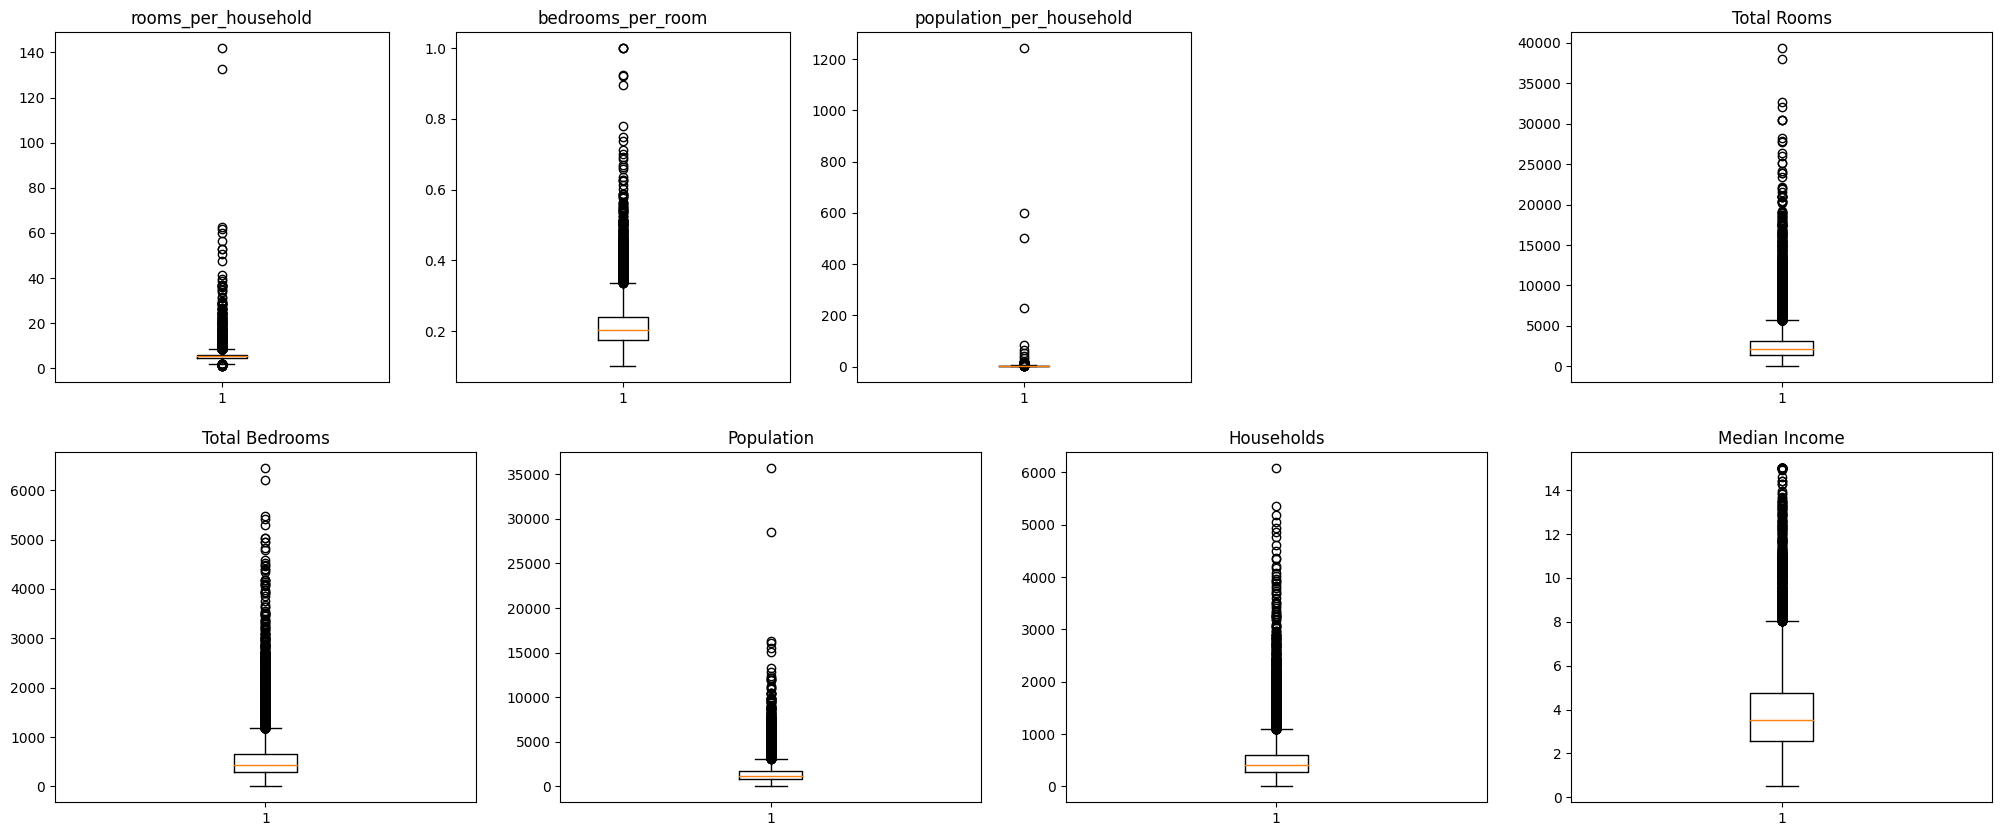

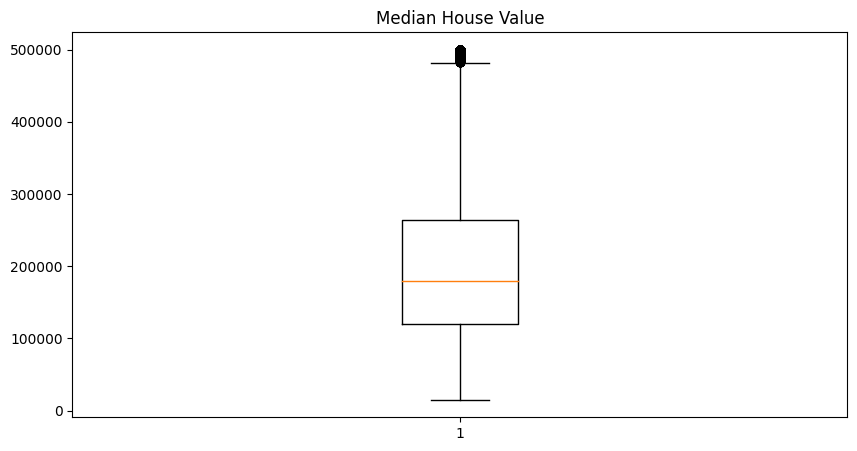

In [ ]:
# Analysis outliers 

plt.figure(figsize=[25,10])

plt.subplot(241); plt.boxplot(df["longitude"]); plt.title("Longitude")
plt.subplot(242); plt.boxplot(df["latitude"]); plt.title("Latitude")
plt.subplot(243); plt.boxplot(df["housing_median_age"]); plt.title("Housing Age")
plt.subplot(244); plt.boxplot(df["total_rooms"]); plt.title("Total Rooms")
plt.subplot(245); plt.boxplot(df["total_bedrooms"]); plt.title("Total Bedrooms")
plt.subplot(246); plt.boxplot(df["population"]); plt.title("Population")
plt.subplot(247); plt.boxplot(df["households"]); plt.title("Households")
plt.subplot(248); plt.boxplot(df["median_income"]); plt.title("Median Income")
plt.subplot(251); plt.boxplot(df["rooms_per_household"]); plt.title("rooms_per_household")
plt.subplot(252); plt.boxplot(df["bedrooms_per_room"]); plt.title("bedrooms_per_room")
plt.subplot(253); plt.boxplot(df["population_per_household"]); plt.title("population_per_household")

plt.figure(figsize=[10,5])
plt.boxplot(df["median_house_value"]); plt.title("Median House Value")
plt.show()

In [26]:
# Remove outliers 

columns = ["total_rooms", "total_bedrooms", "population", "households", "median_income", "rooms_per_household", "bedrooms_per_room", "population_per_household"]
df_clean = df.copy()

for col in columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df_clean[(df_clean[col] >= Q1 - 1.5*IQR) & (df_clean[col] <= Q3 + 1.5*IQR)]

df_clean = df[df['median_house_value'] < 500001] # Delete data that has no ceiling

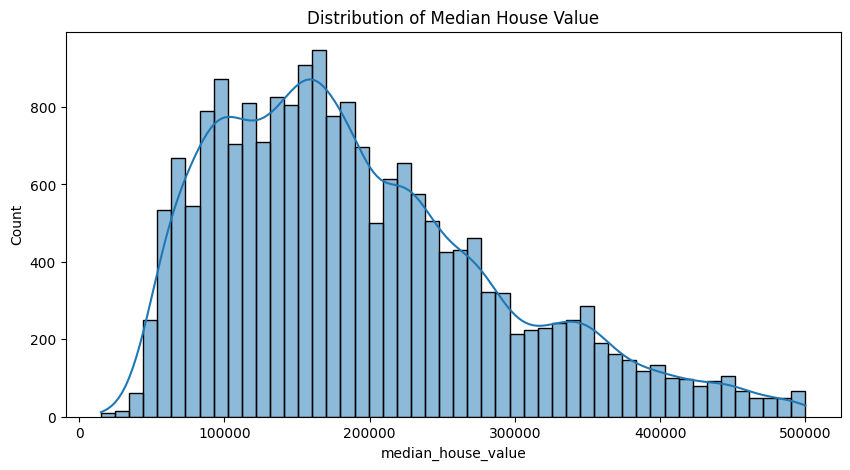

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df_clean['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.show()

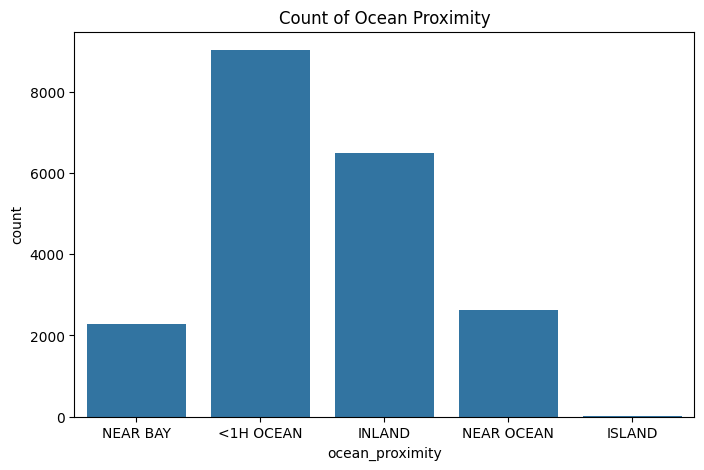

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(x='ocean_proximity', data=df)
plt.title("Count of Ocean Proximity")
plt.show()

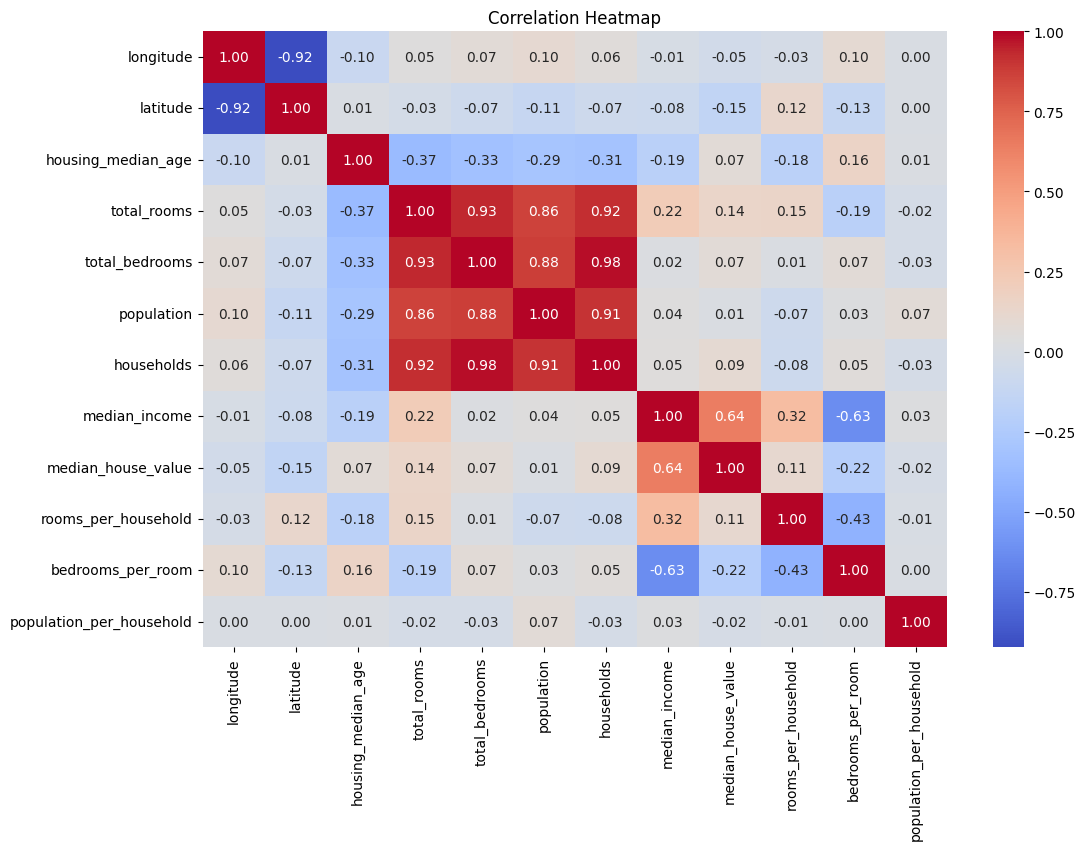

In [29]:
numeric_cols = df_clean.drop("ocean_proximity", axis=1).columns

corr = df_clean[numeric_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

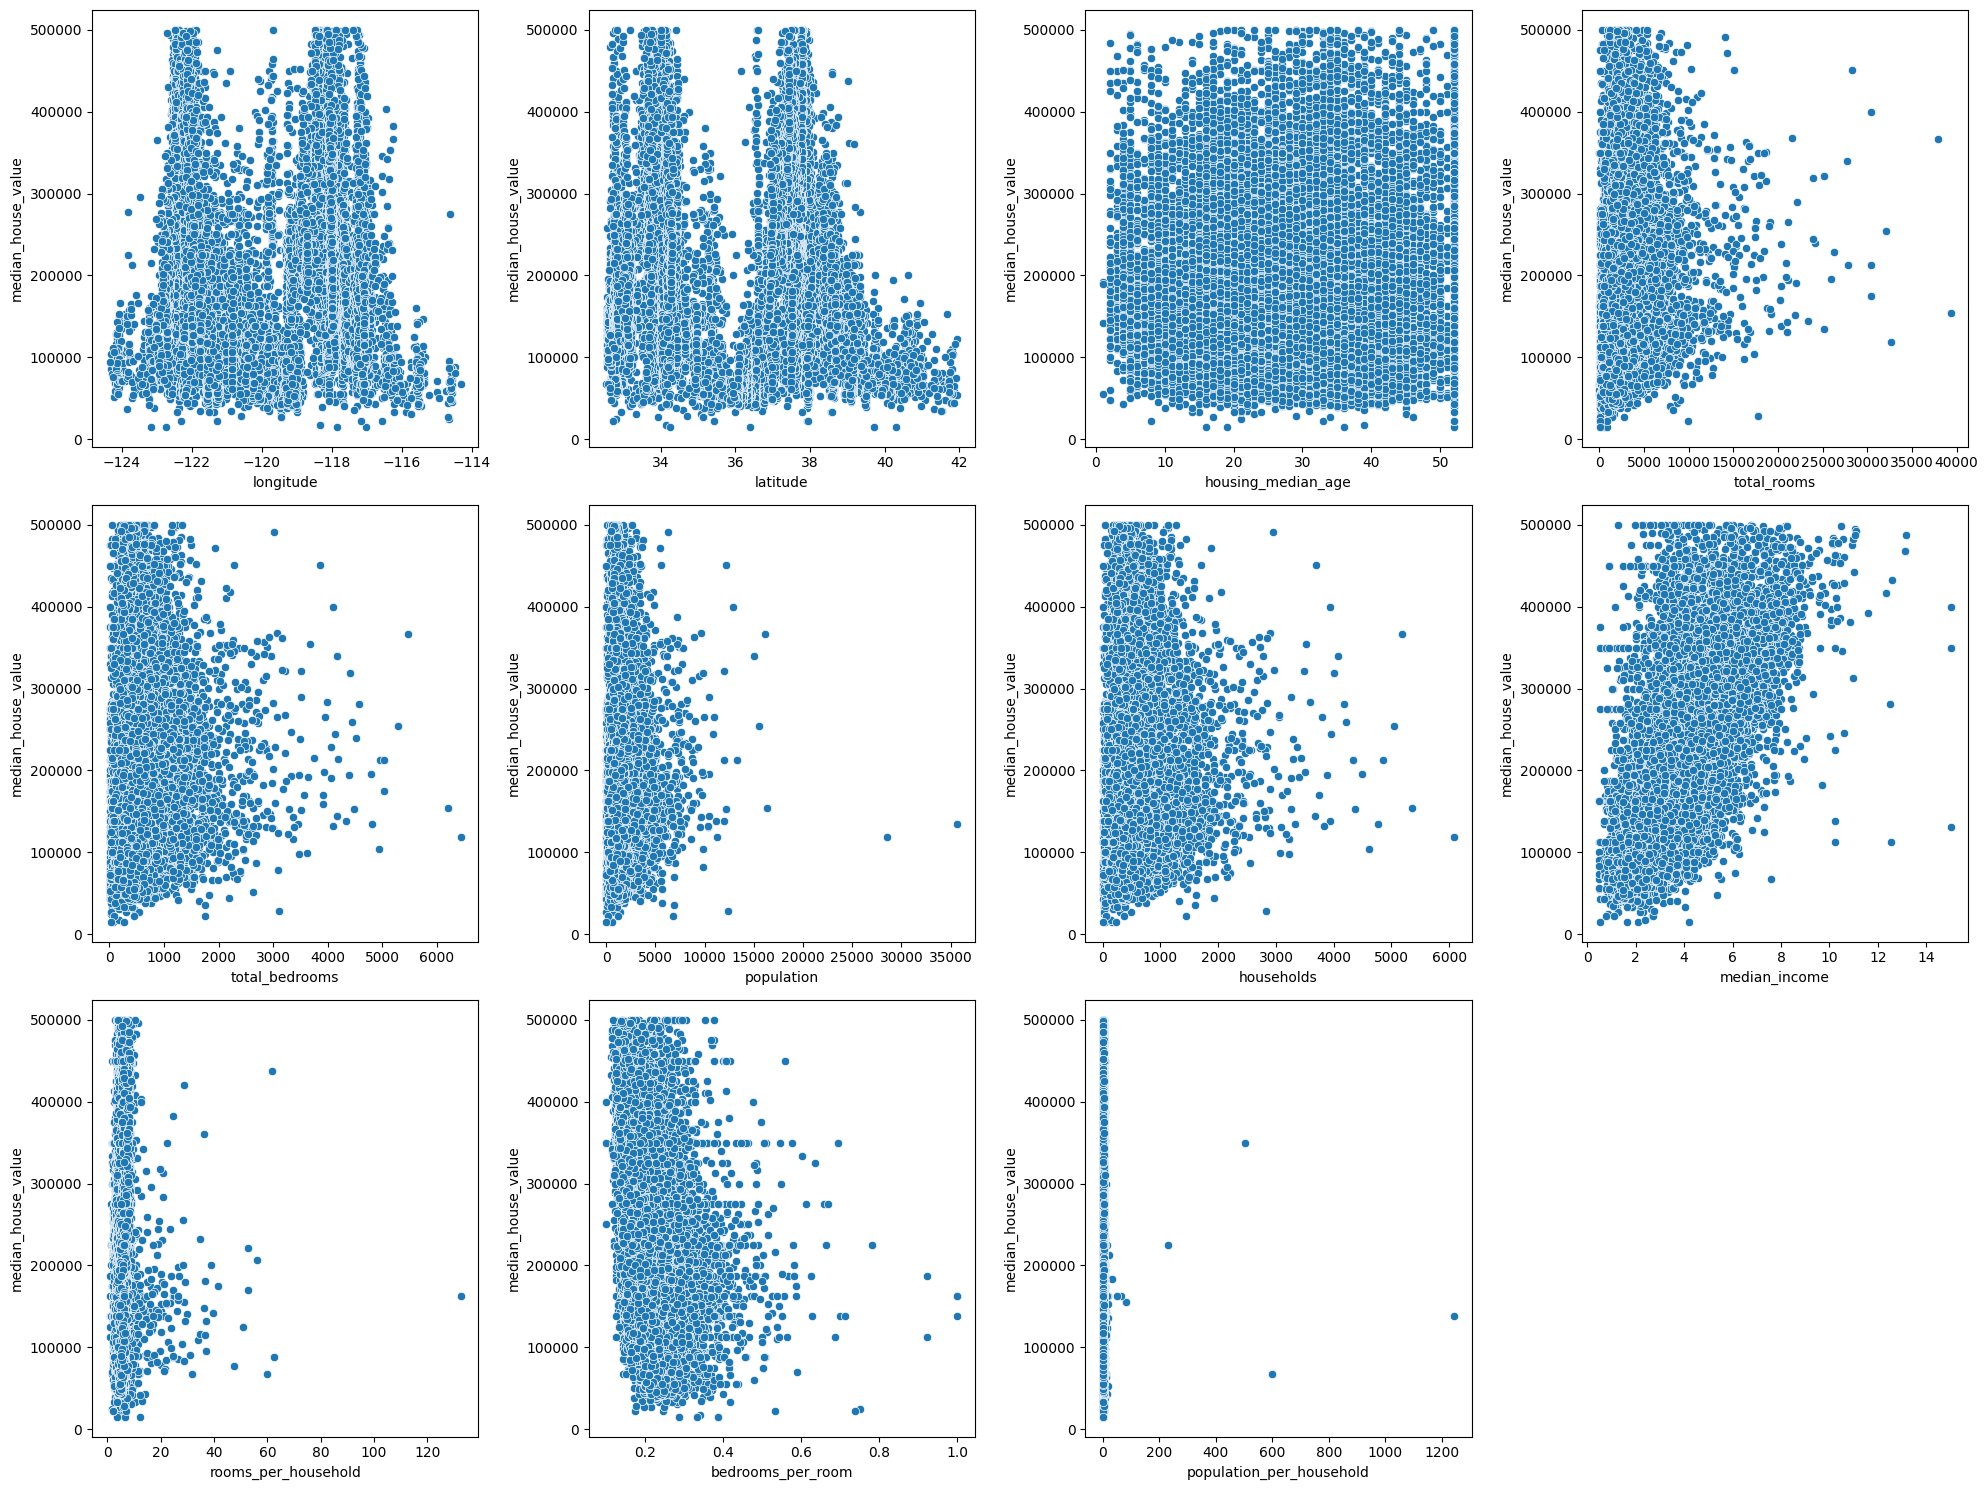

In [42]:
# Analysis functional features for target 

numeric_cols = ['longitude', 'latitude', 'housing_median_age', 
                'total_rooms', 'total_bedrooms', 'population', 
                'households', 'median_income', "rooms_per_household", "bedrooms_per_room", "population_per_household"]

plt.figure(figsize=(20,15))

for i, col in enumerate(numeric_cols):
    plt.subplot(3,4,i+1)
    sns.scatterplot(x=df_clean[col], y=df_clean['median_house_value'])
    plt.xlabel(col)
    plt.ylabel('median_house_value')

plt.tight_layout()
plt.show()

In [34]:
# Convert object to numeric data 
label_encode = preprocessing.LabelEncoder() 
df_clean["ocean_proximity"] = label_encode.fit_transform(df_clean["ocean_proximity"])

/tmp/ipykernel_6693/2552841311.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["ocean_proximity"] = label_encode.fit_transform(df_clean["ocean_proximity"])


In [35]:
# Split features and target 
X = df_clean.drop("median_house_value", axis=1) 
y = df_clean["median_house_value"] 

In [36]:
# Normalization data 
scaler = preprocessing.StandardScaler() 
X = scaler.fit_transform(X) 

In [37]:
# Split data to train, test and validation 
x_train, x_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42
)

In [ ]:
# ---------------------------------------------------
# Use Extreme gradient boosting algorithm (XGBoosting)
# ---------------------------------------------------

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define model
xgb = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=3,   # 3-fold cross-validation
    scoring='r2',
    verbose=2,
    n_jobs=-1
)

# Fit model
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best model
best_xgb = grid_search.best_estimator_

# Predict
y_val_pred = best_xgb.predict(x_val)
y_test_pred = best_xgb.predict(x_test)

# Evaluation
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

print("="*40)

print("Validation MAE:", mean_absolute_error(y_val, y_val_pred))
print("Validation MSE:", mean_squared_error(y_val, y_val_pred))
print("Validation R2:", r2_score(y_val, y_val_pred))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


/home/amirmohammad/Github projects/MachineLearning Proejcts/Home-price-detection/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/amirmohammad/Github projects/MachineLearning Proejcts/Home-price-detection/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (w

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.4s


/home/amirmohammad/Github projects/MachineLearning Proejcts/Home-price-detection/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/home/amirmohammad/Github projects/MachineLearning Proejcts/Home-price-detection/venv/lib/python3.8/site-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (w

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.7s[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.7s

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   1.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.6s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1; total time=   0.9s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300